# Samples Stratified by Vintage

We need to compensate for my data being skewed to recent pool vintages.

In [1]:
import os
os.chdir("/home/charles/src/LondonMirror/Prepayments/")

import prepayments as pp
import numpy as np
import pandas as pd
import ggplot as gg
import datetime

pm = pp.models.PoolModel()

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
N_SAMPLES = 50000

In [4]:
data = pm.get_samples_with_old_dates(N_SAMPLES, csv_path="/data/prepayments/samples4.csv")

/usr/lib/python2.7/dist-packages/tables/path.py:100: NaturalNameWarning: object name is not a valid Python identifier: '20'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/usr/lib/python2.7/dist-packages/tables/path.py:100: NaturalNameWarning: object name is not a valid Python identifier: '18'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
ERROR:root:No CPR data for 36290XS84
/usr/lib/python2.7/dist-packages/tables/path.py:100: NaturalNameWarning: object name is not a valid Python identifier: '29'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
ERROR:root:N

`Problems closing the Group _36230R6H4`

I'm going to have to come up with a better storage solution for CPRs.

In [6]:
import cPickle as pickle

In [7]:
old_data = pickle.load(open("/data/prepayments/sample_data.pickle", "rb"))

In [8]:
len(old_data)

1086

In [9]:
new_data = pd.read_csv("/data/prepayments/samples3_1.csv")

In [19]:
pd.DataFrame.from_dict(old_data, orient='index').reset_index().to_csv("/data/prepayments/samples3_1.csv")

In [9]:
newer_data = pickle.load(open("/data/prepayments/sample_data.pickle", "rb"))
len(newer_data)

4588

In [7]:
len(old_data)

360

In [10]:
newer_data.extend(old_data)

In [11]:
len(newer_data)

4948

In [14]:
newer_data[0]

{'burnout': 2528.0,
 'cato': -0.27290000000000003,
 'dt': Timestamp('2016-08-01 00:00:00'),
 'hpa': 0.097630026676744641,
 'incentive': 558.0,
 'lockin': 0.86008024072216649,
 'next_month_cpr': 0.40999999999999998,
 'seasonality': 8,
 'upfront_mip': 12.648461538461538,
 'wala': 6}

In [15]:
data = pd.DataFrame.from_records(newer_data)
data.shape

(4948, 10)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4948 entries, 0 to 4947
Data columns (total 10 columns):
burnout           4948 non-null float64
cato              4948 non-null float64
dt                4948 non-null datetime64[ns]
hpa               4931 non-null float64
incentive         4948 non-null float64
lockin            4948 non-null float64
next_month_cpr    4948 non-null float64
seasonality       4948 non-null int64
upfront_mip       4948 non-null float64
wala              4948 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 386.6 KB


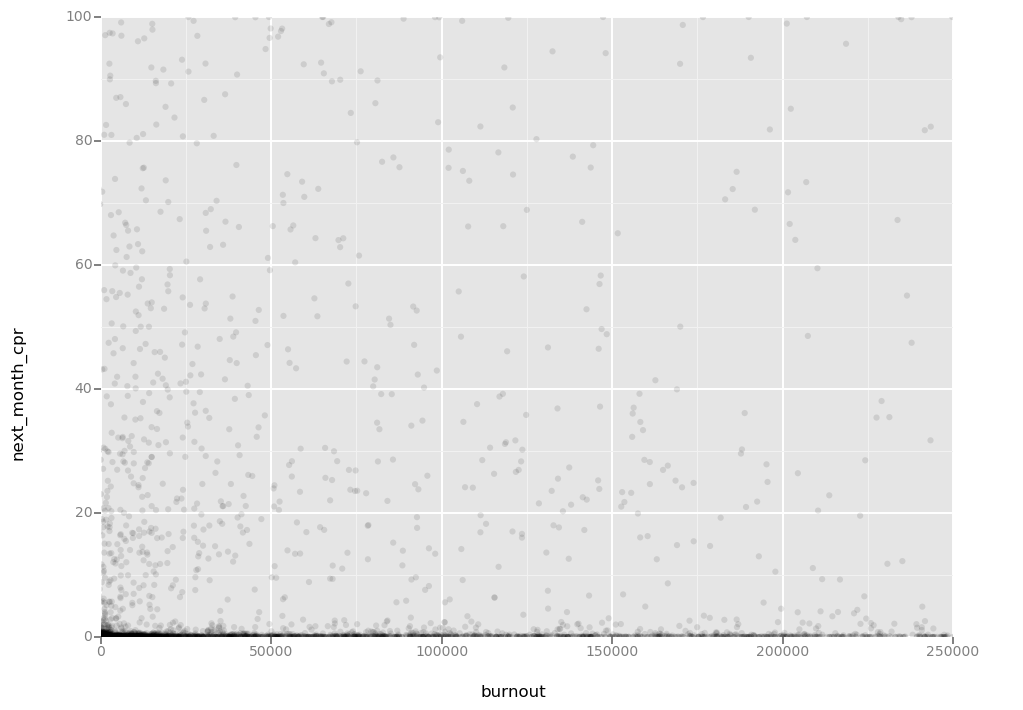

<ggplot: (8744618493813)>

In [26]:
gg.ggplot(data, gg.aes(x='burnout', y='next_month_cpr')) + gg.geom_point(alpha=0.1) + \
        gg.xlim(0, 250000) + gg.ylim(0, 100)

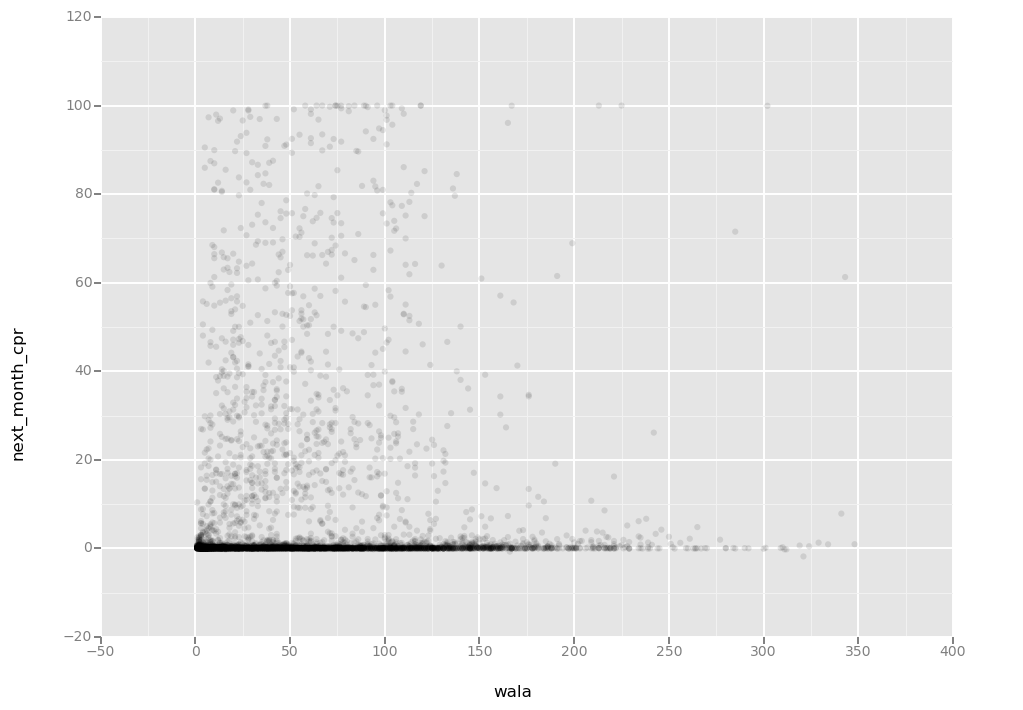

<ggplot: (8744618050221)>

In [33]:
gg.ggplot(data, gg.aes(x='wala', y='next_month_cpr')) + gg.geom_point(alpha=0.1)

I'm just going to look at these in R where I have a nice splom function.

In [34]:
data.to_csv("/data/prepayments/samples_pm.csv")